In [ ]:
from IPython.display import display
from PIL import Image
display(Image.open("dirichlet08.png"))

にしましょう

In [ ]:
<img src="https://raw.github.com/github/media/master/octocats/octocat.png">

はhtmlでもipynbでのダウンロードでも非対応だった。あと複雑なLaTexはhtmlだめ

# 1.2 確率論

### 目次

- 概要
- 確率の基本法則の定義
- 離散変数における確率の基本法則の導出
- 同時確率と周辺分布と条件付き分布
- ベイズの定理
- ベイズの定理の解釈
- 確率密度
- 期待値と分散
- ベイズ確率

### 概要

**パターン認識の分野における鍵となる概念は『不確実性』である。**<br>
なぜなら、データの集合のサイズが有限であったり、計測ノイズが必ず存在するからである。<br>
**確率論（probability theory）**は、その『不確実性』に関する定量化と操作に関して一貫した枠組みを与え、パターン認識の基礎の中心を担っている。

### 確率の基本法則の定義

|              | **離散変数** | **連続変数** |
|:--------------:|:---------------:|:---------------:|
| **加法定理**      |  $ p(X) = \\ \sum_{y}^{}p(X, Y) $       |   $ p(X) = \\ \int p(X, Y) \mathrm{d}y $       |
| **乗法定理**     |  $ p(X, Y) = \\  p(Y | X)p(X) $      |    $ p(X, Y) = \\  p(Y | X)p(X) $    |

### 離散変数における確率の基本法則の導出

図1.10に示す2つの確率変数X,Yからなる、少し一般化した設定を考える

$X$ は確率変数であり、値 $x_i (i=1,...,M)$をとる <br>
$Y$ は確率変数であり、値 $y_j (j=1,...,L)$をとる <br>
$N$ は全試行回数 <br>
$n_{ij}$ は $X=x_i$と$Y=y_j$ となる試行数 <br>
$c_i$ は $x_i$ となる試行数 <br>
$r_j$ は $y_j$ となる試行数 <br>

図1.10と具体例

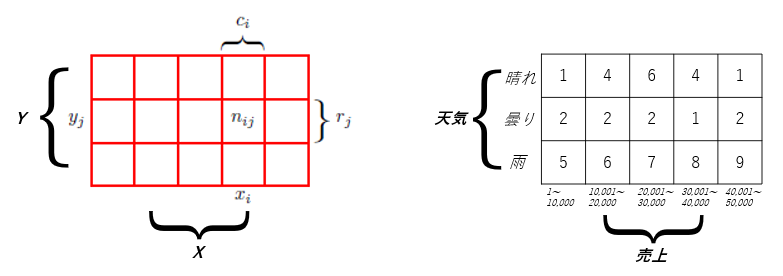

In [1]:
from IPython.display import display
from PIL import Image
display(Image.open("./img/1.10.png"))

$ Xがx_i, Yがy_j を取る確率をp(X=x_i, Y=y_j)と書き、X=x_iとY=y_j $の**同時確率（結合確率;joint probability）**と呼ぶ。<br>
これは$ i,j $という枠内にある点の個数を点の総数で割った数のため、式(1.5)で与えられる。
$$ 
\quad \\
p(X=x_i, Y=y_j) = n_{ij}/N \quad \quad(1.5) 
$$

同様にして、$X$が$x_i$を取る確率を$p(X=x_i)$と書くと、$i$列にある数を総数で割った数で、式(1.6)で与えられる。
$$ 
\quad \\
p(X=x_i) = c_i/N \quad \quad(1.6) 
$$

図1.10の$ i $列の事例数は、単にその列にある枠内の事例数の総和だから、$ c_i = \sum_{j}n_{ij} $であり、(1.5)と(1.6)より、式(1.7)が成り立つ。
$$ 
\quad \\
p(X=x_i) = \sum_{j=1}^{L}p(X=x_i, Y=y_j) \quad \quad (1.7)
$$

式(1.7)が確率の**加法定理(sum rule)**である。<br>
$ p(X=x_i) $は他の変数についての周辺化、すなわち（この場合は$Y$についての）足し合わせのため、**周辺確率(marginal probability)**と呼ばれることもある。

$ X=x_i $の事例だけを考え、その中での$ Y=y_j $の事例の比率を$ p(Y=y_j, |X=x_i) $と書き、$ X=x_i $が与えられた下での$ Y=y_j $の**条件付き確率(conditional probability)**と呼ぶ。これは$ i $列の中で$ i,j $の枠内にある点の数の比率のため、式(1.8)となる。
$$ 
\quad \\
p(Y=y_j|X=x_i) = n_{ij}/c_i \quad \quad (1.8)
$$

$(1.5),(1,6)および(1.8)から、(1.9)$の関係を得る。
$$ 
\quad \\
p(X=x_i,Y=y_j) \\
= n_{ij}/N \\
= n_{ij}/c_i * c_i/N \\
= p(X=x_i|Y=y_j)p(X=x_i) \\
(1.9)
$$

この$(1.9)$は確率の**乗法定理(product rule)**である。

ここで、$ p(X,Y) $は同時確率で、詳しく言えば「$X$ かつ $Y$の確率」である。<br>
同様に、$ p(Y|X) $は条件付き確率で、「$X$ が与えられた下でも $Y$ の確率」である。<br>
この2つの単純な法則は本書を通じて行う、すべての確率計算の基礎となる。

### 同時確率と周辺分布と条件付き分布

2変数に対する同時分布をヒストグラムを使って、周辺分布と条件付き分布の概念を図示する。（図1.11）

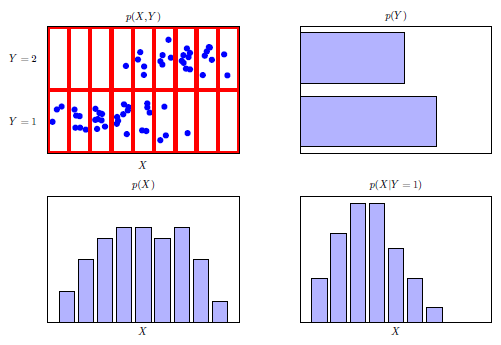

In [2]:
display(Image.open("./img/1.11.png"))

1. 9つの値を取り得る変数Xと2つの値を取り得るYの2変数に対する分布の図。 <br>
2. 左上の図は2つの変数X,Yの同時確率から生成した60個のサンプル点を示す。 <br>
3. 右上の図は周辺分布p(Y)、左下の図は周辺分布p(X)のヒストグラムである。 <br>
4. 右下の図は条件分布$p(X|Y=1)$のヒストグラムである。<br><br>

ヒストグラムは、ある確率分布から生成した有限個の点だけ与えられたとき、もとの確率分布をモデル化する単純な方法とみなすことができる。<br>
データから分布をモデル化するというのは統計的パターン認識の中心をなす。

### ベイズの定理

乗法定理および対称性$ p(X,Y) = p(Y,X) $から、式(1.12)の関係を得る。
$$
\quad \\
p(Y,X) = p(X,Y) \\
⇔ p(Y|X)p(X) = p(X|Y)p(Y) \\
⇔ p(Y|X) = p(X|Y)p(Y)/p(X) \\
(1.12)\\
$$

これは**ベイズの定理(Bayes' theorem)**と呼ばれ、パターン認識や機械学習において中心的役割を果たす。<br>
また、ベイズの定理の分母($ p(X) $)は、加法定理を用いると、分子($ p(X|Y)p(Y) $)を使って表現できる。
$$
\quad \\
p(X) = \sum_Yp(X|Y)p(Y) \quad \quad (1.13)
$$

ベイズの定理の分母は$(1.12)$式の左辺の条件付き確率をすべての$Y$について和をとったものが1になることを保証するための規格化（正規化）定数とみなすことができる。（証明は、式$(1.13)$を式$(1.12)$に代入し、両辺の$\sum_Y$を取ると右辺が1となることからわかる）

### ベイズの定理の解釈

箱（red, blue）を選ぶ確率と、その箱の中から果物（apple, orange）を選ぶ確率を以下の式で定義する。

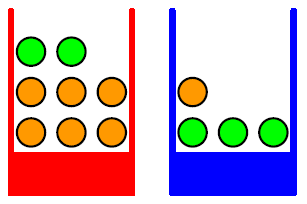

In [3]:
display(Image.open("./img/1.9.png"))

$
p(B=r) = 4/10 \quad \quad (1.14) \\
p(B=b) = 6/10 \quad \quad (1.15) \\
p(F=a|B=r) = 1/4 \quad \quad (1.16) \\
p(F=o|B=r) = 3/4 \quad \quad (1.17) \\
p(F=a|B=b) = 3/4 \quad \quad (1.18) \\
p(F=o|B=b) = 1/4 \quad \quad (1.19) \\
$

ここで、確率の加法定理・乗法定理を用いると、りんご（apple）を選ぶ確率を計算することができる。
$$
\quad \\
p(F=a) \\
=\sum_{B}p(F=a|B)p(B) \\
=p(F=a|B=r)p(B=r) + p(F=a|B=b)p(B=b) \\
=(1/4 * 4/10) + (3/4 * 6/10) \\
=11/20
$$

一方で、『オレンジを選んだときに、どの箱から取り出されたものかを知りたい場合』は、条件付き確率を考える必要がある。<br>
まず、ベイズの定理を用いて、オレンジを選んだ時に箱が赤であったときの確率を求める。<br>

$$
p(B=r|F=o) \\
=p(F=o|B=r)B(B=r)/p(F=o) \\
=3/4*4/10*20/9 \\
=2/3
$$

ベイズの定理の重要な解釈を与える。選んだ果物の種類を教えられる前にどの箱を選んだかを尋ねられたら、我々の持つ最も完全な情報は$p(B)$という確率値で与えられる。これを**事前確率(prior probability)**と呼ぶ。なぜなら、どの果物を選んだかを観測するより**事前に**得られる確率値だからである。一旦果物がオレンジだとわかれば、ベイズの定理を使って、確率$p(B|F)$を計算できる。これを**事後確率(posterior probability)**と呼ぶ。なぜなら、これはFを観測した事後の確率だからである。<br>

この例では、赤い箱を選ぶ事前確率は4/10で、赤い箱よりも青い箱がより選ばれやすい。しかしながら、一旦果物がオレンジだとわかれば、赤い箱の事後確率は今度は2/3となって、選んだ箱が赤である可能性が高くなる。これを直感的に解釈すると、赤い箱の方が青い箱よりもオレンジの比率がずっと大きいので、オレンジにを観測したときに、それが赤い箱のものであるという強い証拠になると考えればよい。

## 1.2.1 確率密度

離散的な事象集合に対して定義される確率分布と同様に、連続変数についても確率を考える。<br>
実数値をとる変数$x$が区間$(x,x+\delta{x})$に入る確率が、$\delta{x}→0$のとき$p(x)\delta{x}$で与えられるとき、$p(x)をx$上の**確率密度(probability density)**と呼ぶ。これを図1.12に示す。このとき、$x$ が区間 $(a,b)$ にある確率は $(1.24)$ で与えられる。
$$
\quad \\
p(x\in(a,b)) = \int^b_a p(x) \mathrm{d}x \quad \quad (1.24)
$$

確率は非負で$x$は実数値上のどこかの値をとらなければならないから、確率密度は以下の2つの条件を満たす必要がある。
$$
\quad \\
p(x) \geq 0 \qquad (1.25) \\
\int^\infty_{-\infty}p(x) \mathrm{d}x = 1 \qquad (1/26) \\
$$

変数に非線形な変換を行った場合、確率密度はヤコビ因子（$|\mathrm{d}x/\mathrm{d}y|$）により単純な関数とは異なる形式で変換される。<br>
例えば、変数変換$x=g(y)$を行う場合、関数$f(x)$は$\tilde{f}(x)=f(g(y))$となる。<br><br>

さて、確率密度$p_x(x)$に対応する、新しい$y$に関する$p_y(y)$を考える。（ここでは添え字によって異なる密度$p_x(x)$、$p_y(y)$を表すこととする）<br>
区間$(x, x+\delta{x})$に入る観測値は$\delta{x}$が小さければ区間$(y, y+\delta{y})$に入り、$p_x(x)\delta{x} \simeq p_y(y)\delta{y}$となるため（←この前提条件が分からなかったので、お力を貸していただけますと...）式$(1.27)$となる。

$$
p_y(y)\delta{y} = p_x(x)\delta{x}　\\
\Leftrightarrow p_y(y) = p_x(x) | \mathrm{d}x / \mathrm{d}y | \\
\Leftrightarrow p_y(y) = p_x(g(y))|g'(y)| \\
(1.27)
$$

この性質からわかることは、**確率密度の最大値は変数の選び方に依存する**ということである。<br>
演習問題1.4が変数の選び方によって変数変換後の確率変数の最大値が変わることの証明を行っている。<br>
（ https://www.microsoft.com/en-us/research/wp-content/uploads/2016/05/prml-web-sol-2009-09-08.pdf ）



多変数関数の場合でも、多変数確率密度は算出することができる。

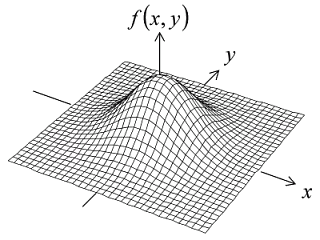

In [4]:
display(Image.open("./img/bivarnorm_dist.gif"))

$x$が区間($-\infty$, z)に入る確率は式(1.28)で定義され、**累積分布関数(cumulative distribution function)**と呼ぶ。<br>
また、$P'(x)=p(x)$を満たす。

$$
P(z) = \int^z_{-\infty}p(x) \mathrm{d}x \qquad (1.28)
$$

また、$x$が離散変数のときは、$p(x)$は**確率質量関数(probability mass function)**と呼ばれることもある。<br>
なぜなら、$x$の取り得る値のところに「確率の質量」が集中しているとみなすことができるからである。

## 1.2.2 期待値と分散

確率を含む重要な操作の1つは関数の重み付きの平均を求めることである。<br>
ある関数$f(x)$の、確率分布p(x)の下での平均値をf(x)の**期待値(expectation)**と呼び、$\mathbb{E}[f]$と書く。このとき、離散分布に対しては式$(1.33)$で定義される。
$$
\quad \\
\mathbb{E}[f] = \sum_x{p(x)f(x)} \qquad (1.33)
$$

これより、平均値は$x$のとる値($f(x)$)ごとに確率値($p(x)$)で重み付けられることになる。<br><br>

一方で、連続変数の場合の期待値は対応する確率密度に関する積分で表される。
$$
\quad \\
\mathbb{E}[f] = \int{p(x)f(x) \mathrm{d}x.} \qquad (1.34)
$$

どちらの場合も、確率分布や確率密度から得られた有限個の$N$点を用いて、期待値はこれらの点での有限和で近似できる。
$$
\quad \\
\mathbb{E}[f] \simeq \frac{1}{N} \sum^N_{n=1} f(x_n) \qquad (1.35)
$$

11章でサンプリング法について議論する際にこの結果を頻繁に使うことになる。<br>
$(1.35)$の近似は$N→\infty$の極限で厳密になる。

多変数関数の期待値を考える場合、どの変数についての期待値であるかを示すのに添え字を使う。<br>
関数$f(x,y)$の$x$の分布に関する平均を表す場合、式(1.36)のように表現できる。
$$
\quad \\
\mathbb{E}_x[f(x,y)] \qquad (1.36)
$$

条件付き確率分布についても**条件付き期待値（conditional expectation）**を考えることができ、
$$
\quad \\
\mathbb{E}_x[f|y] = \sum_xp(x|y)f(x) \qquad (1.37)
$$

となり、連続変数についても同様に定義できる。（ $\sum$が$\int$になる ）

$f(x)$の分散(variance)は式(1.38)で表現できる<br>
分散とは、データの散らばり度合いを表現する指標である<br>
$$
\quad \\
var[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] \qquad (1.38)
$$

## 1.2.3 ベイズ確率

まず、ベイズの定理を使って、情報を得れば次に取るべき行動の選択確率は変わるということを確認する。<br>
ここでは、モンティ・ホール問題をベイズの定理を使って考えてみる。<br>
（ https://ja.wikipedia.org/wiki/モンティ・ホール問題 ）

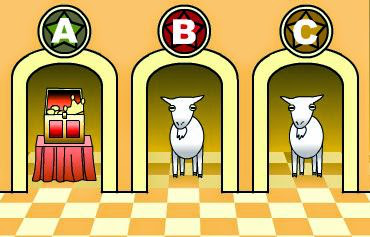

In [5]:
# モンティ・ホール問題のイメージ図
display(Image.open("./img/month-hall-problem.jpg"))

### ベイズの定理を使って、モンティホール問題を解く
#### 問題
自分がBのドアを選び、その後、司会者がCのドアを選んでCのドアがハズレであることを示したとする。<br>
このとき、自分はAとBのどちらを選んだ方が当たる確率が高まるか。<br>

#### 回答
まず、確率変数$X,Y$を以下のように定義する<br>
$X$は当たりのドア<br>
$X = x_i[x_i = A,B,C]$<br><br>
$Y$は司会者が選ぶドア<br>
$Y = y_j[y_j = A,B,C]$<br><br>

このとき、以下の２つの条件付き確率を算出することにより、モンティホール問題を解を得る<br>
$$
\quad \\
P(X=B | Y=C) \qquad(☆)\\
P(X=A | Y=C) \qquad(★)\\
$$

ベイズの定理より、<br>
$$
P(X=B | Y=C) = \\
P(Y=C | X=B)*P(X=B) / P(Y=C) \qquad(☆)　\\
$$

ここで、(☆)のそれぞれの確率を算出すると下記になる<br><br>

**当たりがBのときに、司会者がCを選ぶ確率<br>
(自分がBを選んでいるので、司会者はAかCの２択から選ぶため)**<br>
$$ P(Y=C | X=B) = 1/2 \\ $$

Bが当たりの確率
$$P(X=B) = 1/3 \\ $$

司会者がCを選ぶ確率<br>
（加法定理と乗法定理を組み合わせて算出する）
$$ 
P(Y=C) \\ 
= \sum_{X}P(Y=C, X) \\ 
= P(Y=C, X=A) + P(Y=C,  X=B) + P(Y=C, X=C) \\ 
= P(Y=C | X=A)*P(X=A) + P(Y=C | X=B)*P(X=B) + P(Y=C | X=C)*P(X=C) \\
= 1*1/3 + 1/2 * 1/3 + 0 * 1/3 \\
= 1/2
$$

**これらより、（☆）の確率は、(1/2 * 1/3) / (1/2) = 1/3 となる** <br><br><br>


一方で（★）の場合、ベイズの定理より、<br>
$$
P(X=A | Y=C) = \\
P(Y=C | X=A)*P(X=A) / P(Y=C) \qquad(★)　\\
$$
また、(★)のそれぞれの確率を算出すると下記になる<br><br>

**当たりがAのときに、司会者がCを選ぶ確率<br>
(自分がBを選んでいるので、司会者は当たりのドアAを選べず、ドアCの1択のため)**<br>
$$ P(Y=C | X=A) = 1 \\ $$

Aが当たりの確率
$$P(X=A) = 1/3 \\ $$

司会者がCを選ぶ確率<br>
（加法定理と乗法定理を組み合わせて算出する）
$$ 
P(Y=C) \\ 
= \sum_{X}P(Y=C, X) \\ 
= P(Y=C, X=A) + P(Y=C,  X=B) + P(Y=C, X=C) \\ 
= P(Y=C | X=A)*P(X=A) + P(Y=C | X=B)*P(X=B) + P(Y=C | X=C)*P(X=C) \\
= 1*1/3 + 1/2 * 1/3 + 0 * 1/3 \\
= 1/2
$$

**これらより、（★）の確率は、(1 * 1/3) / (1/2) = 2/3 となる**

これより、司会者がドアCを選んだ条件の下では、ドアAが当たりの確率がドアBが当たりの確率の２倍となることがわかる<br>
**よって、自分はドアBからドアAに変更した方が、当たる確率があがる**

不確実性を定量的に表現し、新たな証拠に照らしてそれを正しく修正し、その結果として最適な行動や決定を下すことは、ベイズ的な確率の解釈にほかならない。<br>

ベイズ確率に関する参考URL
（ https://www.slideshare.net/hoxo_m/5-28064011 ）

#### 再掲：ベイズの定理
$$
p(w|\mathcal{D}) = p(\mathcal{D}|w)p(w) / p(\mathcal{D}) \qquad (1.43)
$$

$$
p(w|\mathcal{D})は事後確率 \\
p(\mathcal{D}|w)は尤度関数 \\
p(w)は事前確率 \\
p(\mathcal{D})は周辺尤度 \\
$$

頻度主義で広く用いられている推定量は**最尤推定(maximux likelihood)**で、$w$は尤度関数$p(\mathcal{D|w})$を最大にする値である。<br>
これは観測されたデータ集合の確率を最大化する$w$の値を選ぶことに相当する。<br>

機械学習の分野では、尤度関数の対数の符号を反転したものは**誤差関数（error function）**と呼ばれる。<br>
対数のマイナスは単調減少関数だから、尤度の最大化は誤差の最小化と等価である。

頻度主義とベイズ主義の違い<br>
( https://to-kei.net/bayes/basic/ )

|  | 頻度主義 | ベイズ主義  |
|:---:|:---:|:---:|
| データ | 変数  |　定数  |
| パラメタ  |定数  |　変数  |
<br>


ベイズアプローチに対する批判としては以下の2点が主としてある
1. 事前分布が数学的な便宜によって選ばれることが多い
2. 悪い事前分布を選べば、高い確率で悪い結果を得る
これらの問題点は、頻度主義的な評価方法によって、ある程度防ぐことができる

本書『パターン認識と機械学習』の立ち位置としては、ベイズ的な視点を強調する一方で、必要に応じて、有用な頻度主義的な概念も議論する<br>
ベイズ法の歴史は18世紀からあり、現代ではマルコフ連鎖モンテカルロ法のようなサンプリング法の開発や、計算機の速度やメモリ量の大幅な進歩により、ベイズ法が極めて広い範囲の問題に実用的に使えるようになった。しかしながら、これでも計算量が非常に大きいので、これでは主に小さいスケールの問題に用いられてきた<br>

さらに最近になって、変分ベイズ法やEP法（期待値伝播法）といった、非常に能率的な決定論的近似が開発された。<br>
これらの手法はサンプリング法が使えない場合、その代替的手法として使われ、ベイズ法を大規模な応用に適用することを可能にした。<br>
ベイズ統計学に関する資料<br>
( https://www.slideshare.net/miyoshiyuya/ss )

### マークダウンの参考URL
https://en.wikibooks.org/wiki/LaTeX/Mathematics